# 📩 SMS Spam Classifier - Summary

This project builds a spam detection model using machine learning (Multinomial Naive Bayes) in Python.

---

## 🔍 What It Does
- Reads SMS data and labels (`spam` or `ham`)
- Cleans messages (removes punctuation, stopwords)
- Converts text into numbers using **Bag of Words** and **TF-IDF**
- Trains a spam classifier using Naive Bayes
- Predicts and evaluates on test messages

---

## 🔧 Key Steps
1. **Text Preprocessing**  
   - Remove punctuation & stopwords  
   - Tokenize messages

2. **Feature Extraction**  
   - `CountVectorizer`: Bag of Words  
   - `TfidfTransformer`: Weight terms

3. **Model Training**  
   - `MultinomialNB` classifier with pipeline

4. **Evaluation**  
   - `classification_report()` shows model performance

---

## 📈 Output
- Accuracy and precision on unseen SMS
- Detects spam based on word patterns

---

> Simple, fast, and effective for small NLP tasks.


In [1]:
import nltk

In [2]:
# Optional: For downloading NLTK data packages
# nltk.download_shell()

In [3]:
# Load raw messages from the dataset file
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [4]:
print(len(messages)) # Total number of messages

5574


In [5]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [6]:
import pandas as pd 

In [7]:
# Convert dataset into a structured DataFrame
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=['label', 'message'])

In [8]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# Basic statistical summary
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [11]:
# Add a new feature for message length
messages['length'] = messages['message'].apply(len)

In [12]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

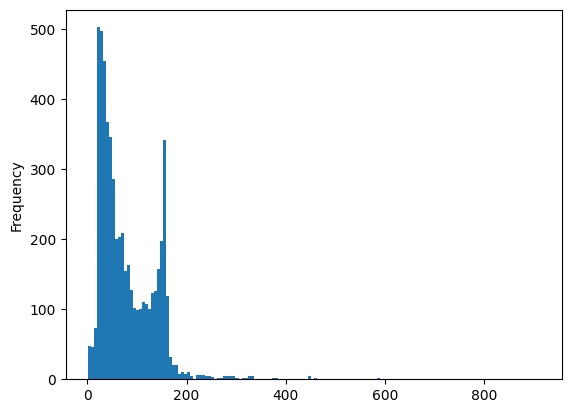

In [14]:
# Visualize distribution of message lengths
messages['length'].plot.hist(bins=150)
plt.show()

In [15]:
messages['length'].describe()

count    5572.000000
mean       80.490309
std        59.944527
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [16]:
# Check length stats and an example of longest message
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

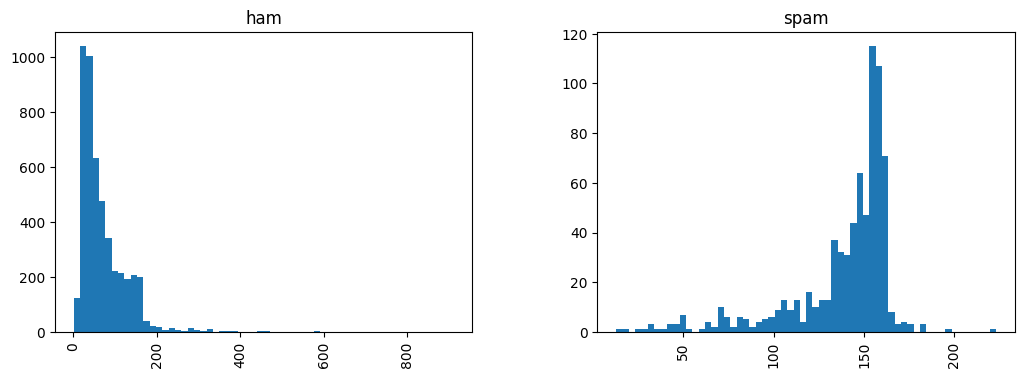

In [17]:
# Compare lengths of spam vs ham
messages.hist(column='length', by='label', bins=60, figsize=(12, 4))
plt.show()

# 🔤 Text Preprocessing: remove punctuation

In [18]:
import string

In [19]:
# Ex for removing punctuation
mess = "'Don't die as avgrage, strive for [greatness]" 

In [20]:
nopunct = [c for c in mess if c not in string.punctuation]

In [21]:
nopunct = ''.join(nopunct)
print(nopunct)

Dont die as avgrage strive for greatness


In [22]:
# Remove stopwords like as, for 
from nltk.corpus import stopwords

In [23]:
nopunct.split()

['Dont', 'die', 'as', 'avgrage', 'strive', 'for', 'greatness']

In [24]:
clean_mess = [word for word in nopunct.split() if word.lower() not in stopwords.words('english')]

In [25]:
clean_mess

['Dont', 'die', 'avgrage', 'strive', 'greatness']

# ✅ Custom text processing function for vectorizer

In [26]:
def text_process(mess):
    """ 
    1. remove punchuation 
    2. remove stop words 
    3. return list of clean text words 
    """
    
    nopunct = [char for char in mess if char not in string.punctuation]
    
    nopunct = ''.join(nopunct)
    
    return [word for word in nopunct.split() if word.lower() not in stopwords.words('english')]

In [27]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

### **Normalization: Stemming**

- **Stemming** reduces words to their root form.
- Example: `"running"`, `"ran"`, `"runs"` → `"run"`
- Helps group similar words and reduce vocabulary size.

### **Vectorization Basics**

- **Vectorization** turns text into numeric vectors.
- Each SMS becomes a vector with dimensions = total unique words.

### **CountVectorizer**

- Converts text into a matrix of word counts.
- Ignores word order, just counts frequency.

### **Sparse Matrix**

- Most entries are **zero** → called **sparse**.
- Efficient to store and compute.

# 🌱 Vectorization using Bag of Words

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [31]:
print(len(bow_transformer.vocabulary_)) # Number of unique words

11425


In [32]:
mess4 = messages['message'][3]

In [33]:
mess4

'U dun say so early hor... U c already then say...'

In [34]:
bow4 = bow_transformer.transform([mess4])

In [35]:
print(bow4)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 7 stored elements and shape (1, 11425)>
  Coords	Values
  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [36]:
print(bow4.shape)

(1, 11425)


In [37]:
bow_transformer.get_feature_names_out()[9554] # Example word at index

'say'

Bag of Words Transformation 

In [38]:
messages_bow = bow_transformer.transform(messages['message'])

In [39]:
print('Shape of the Sparse Matrix: ', messages_bow.shape)

Shape of the Sparse Matrix:  (5572, 11425)


In [40]:
# Calculate sparsity (how many zeros)
print('Non-zero occurrences:', messages_bow.nnz)

Non-zero occurrences: 50548


In [41]:
# Non-Zero messages vs actual total no of messages 
Sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('Sparsity: {:.2f}%'.format(Sparsity))

Sparsity: 0.08%


### **TF-IDF (Term Frequency–Inverse Document Frequency)**

- **TF (Term Frequency):** How often a word appears in a document.
- **IDF (Inverse Document Frequency):** How unique that word is across all documents.
- **TF-IDF Score:** High if a word is frequent in a document but rare in the whole corpus.

In [42]:
# 🔢 Apply TF-IDF transformation
from sklearn.feature_extraction.text import TfidfTransformer

In [43]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [44]:
tfidf4 = tfidf_transformer.transform(bow4)

In [45]:
print(tfidf4)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7 stored elements and shape (1, 11425)>
  Coords	Values
  (0, 4068)	0.4083258993338407
  (0, 4629)	0.2661980190608719
  (0, 5261)	0.2972995740586873
  (0, 6204)	0.2995379972369742
  (0, 6222)	0.31872168929491496
  (0, 7186)	0.4389365653379858
  (0, 9554)	0.5385626262927565


In [46]:
# Check importance of a specific word
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

np.float64(8.527076498901426)

In [47]:
# Transform entire bag-of-words into tf-idf values
messages_tfidf = tfidf_transformer.transform(messages_bow)

Naive Bayes Mltinomial model

In [48]:
# 📈 Train Naive Bayes Mltinomial model
from sklearn.naive_bayes import MultinomialNB

In [49]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [50]:
# Predict an individual message
print(spam_detect_model.predict(tfidf4)[0])

ham


In [51]:
messages['label'][2] # Actual label

'spam'

In [52]:
# Predict all messages
all_pred = spam_detect_model.predict(messages_tfidf)

In [53]:
print(all_pred)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [54]:
# ✂️ Train/test split for evaluation
from sklearn.model_selection import train_test_split

In [55]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.3, random_state=101)

In [56]:
from sklearn.pipeline import Pipeline

In [57]:
# import sklearn.ensemble import RandomForestClassifier

In [58]:
# ⚙️ Use pipeline for full text classification flow
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),     # Bag of Words
    ('tfidf', TfidfTransformer()),                        # TF-IDF weighting
    ('classifier', MultinomialNB())                       # Classifier : Try with RandomForestClassifier
])

In [59]:
pipeline.fit(msg_train, label_train) # Train the pipeline

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001B395DB93A0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [60]:
# Predict on test set
predictions = pipeline.predict(msg_test)

In [61]:
# 📊 Evaluate the model
from sklearn.metrics import classification_report
print(classification_report(predictions, label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1543
        spam       0.65      1.00      0.79       129

    accuracy                           0.96      1672
   macro avg       0.83      0.98      0.88      1672
weighted avg       0.97      0.96      0.96      1672

